In [1]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import gensim
from gensim.models import LdaMulticore
from gensim.models import LsiModel
import pyLDAvis.gensim
from gensim import corpora
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

In [3]:
zero_to_one = open('/Users/saadkn/Desktop/zero_one.txt').read()

In [4]:
doc = re.sub(r'\d+', '', zero_to_one.lower()) #gets rid of digits and makes lowercase
doc = re.sub(r'[^\w\s]','', doc) #appropriates punctuation
doc = doc.strip() #strips new line character

In [5]:
tokens = word_tokenize(doc)

In [6]:
stop = set(stopwords.words('english')) # download stopwords

no_stop = [word for word in tokens if (word not in stop)] 

lemmatizer = WordNetLemmatizer() # create lemmatization object
lemmatized_words = [lemmatizer.lemmatize(w) for w in no_stop] #lemmatize with no stopwords

In [7]:
common_words = Counter([w for w in lemmatized_words]).most_common()

# print top 10 most common words
common_words[:20]

[('company', 281),
 ('people', 219),
 ('even', 137),
 ('one', 135),
 ('business', 133),
 ('world', 125),
 ('new', 112),
 ('market', 112),
 ('future', 111),
 ('make', 103),
 ('every', 101),
 ('work', 96),
 ('would', 95),
 ('product', 94),
 ('year', 87),
 ('time', 83),
 ('first', 82),
 ('thing', 79),
 ('today', 78),
 ('like', 78)]

## Most Common Words

In [ ]:
word_list = []
count = []
for word in common_words[:20]:
    word_list.append(word[0])
    count.append(word[1])

df = pd.DataFrame(
    {'Word': word_list,
     'Frequency': count,
    })


fig, ax = plt.subplots(figsize=(15, 10))
ax.grid(False)

# Plot horizontal bar graph
df.sort_values(by='Frequency').plot.barh( x ='Word',
                      y = 'Frequency',
                      ax = ax,
                      color = '#6484ac')


ax.set_title("20 Most Common Words in Zero to One", fontweight = "bold", size = 14)

plt.show(fig)
fig.savefig('/Users/saadkn/Desktop/Most Common Words.png')   # save the figure to file
plt.close(fig)

## Word Cloud

In [9]:
all_words = " ".join(lemmatized_words)
all_words

'preface zero one every moment business happens next bill gate build operating system next larry page sergey brin wont make search engine next mark zuckerberg wont create social network copying guy arent learning course easier copy model make something new already know take world n adding something familiar every time create something new go act creation singular moment creation result something fresh strange unless invest difficult task creating new thing american company fail future matter big profit remain today happens weve gained everything finetuning old line business weve inherited unlikely sound answer threatens far worse crisis today best practice lead dead end best path new untried world gigantic administrative bureaucracy public private searching new path might seem like hoping miracle actually american business going succeed going need hundred even thousand miracle would depressing one crucial fact human distinguished specie ability work miracle call miracle technology tech

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color = 'white',
    stopwords = stopwords,
    max_words = 100,
    max_font_size = 30,
    scale = 3,
    random_state = 1)

wordcloud = wordcloud.generate(all_words)
fig = plt.figure(1, figsize = (12, 12))
plt.axis('off')

wordcloud.to_file('/Users/saadkn/Desktop/wcloud.png')

plt.imshow(wordcloud)
plt.show()

## Bigrams

In [10]:
bow_format = [all_words]
bow_format

['preface zero one every moment business happens next bill gate build operating system next larry page sergey brin wont make search engine next mark zuckerberg wont create social network copying guy arent learning course easier copy model make something new already know take world n adding something familiar every time create something new go act creation singular moment creation result something fresh strange unless invest difficult task creating new thing american company fail future matter big profit remain today happens weve gained everything finetuning old line business weve inherited unlikely sound answer threatens far worse crisis today best practice lead dead end best path new untried world gigantic administrative bureaucracy public private searching new path might seem like hoping miracle actually american business going succeed going need hundred even thousand miracle would depressing one crucial fact human distinguished specie ability work miracle call miracle technology tec

In [ ]:
vec = CountVectorizer(ngram_range = (2, 2)).fit(bow_format)
bag_of_words = vec.transform(bow_format)
sum_words = bag_of_words.sum(axis = 0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

print(words_freq[:10])

In [ ]:
bigrams = []
bigram_count = []
for word in words_freq[:10]:
    bigrams.append(word[0])
    bigram_count.append(word[1])

df = pd.DataFrame(
    {'Bigram': bigrams,
     'Frequency': bigram_count,
    })


fig, ax = plt.subplots(figsize=(15, 10))
ax.locator_params(integer=True)
# Plot horizontal bar graph
df.sort_values(by = 'Frequency').plot.barh( x = 'Bigram',
                      y = 'Frequency',
                      ax = ax,
                      color = '#6484ac')

ax.grid(False)

ax.set_title("10 Most Common Bigrams in Zero to One", fontweight = "bold", size = 14)

plt.show(fig)
fig.savefig('/Users/saadkn/Desktop/Top Bigrams.png')   # save the figure to file
plt.close(fig)

## Named Entity Recognition tagging for company

In [ ]:
sent = nltk.word_tokenize(zero_to_one)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(" ".join(sent))

In [ ]:
doc.ents

In [ ]:
is_org = [x.text for x in doc.ents if x.label_ == "ORG"]

common_orgs = Counter(is_org).most_common(20)
common_orgs

In [ ]:
organizations = []
org_count = []
for i in common_orgs[:10]:
    organizations.append(i[0])
    org_count.append(i[1])

df = pd.DataFrame(
    {'ORGs': organizations,
     'Frequency': org_count,
    })


fig, ax = plt.subplots(figsize=(15, 10))
ax.locator_params(integer=True)
# Plot horizontal bar graph
df.sort_values(by = 'Frequency').plot.barh( x = 'ORGs',
                      y = 'Frequency',
                      ax = ax,
                      color = '#6484ac')

ax.grid(False)

ax.set_title("10 Most Common ORGs Mentioned", fontweight = "bold", size = 14)

plt.show(fig)
fig.savefig('/Users/saadkn/Desktop/Top ORGs.png')   # save the figure to file
plt.close(fig)

In [ ]:
is_person = [x.text for x in doc.ents if x.label_ == "PERSON"]

common_people = Counter(is_person).most_common(20)
common_people

In [ ]:
people = []
people_count = []
for i in common_people[1:11]:
    people.append(i[0])
    people_count.append(i[1])

df = pd.DataFrame(
    {'PERSON': people,
     'Frequency': people_count,
    })


fig, ax = plt.subplots(figsize=(15, 10))


ax.locator_params(integer=True)
# Plot horizontal bar graph
df.sort_values(by='Frequency').plot.barh( x ='PERSON',
                      y = 'Frequency',
                      ax = ax,
                      color = '#6484ac')

ax.grid(False)
ax.set_title("10 Most Common PERSONs Mentioned", fontweight = "bold", size = 14)

plt.show(fig)
fig.savefig('/Users/saadkn/Desktop/Top PERSON.png')   # save the figure to file
plt.close(fig)

## Investigate Topic Modeling

In [11]:
corpus = [d.split() for d in lemmatized_words]
corpus

[['preface'],
 ['zero'],
 ['one'],
 ['every'],
 ['moment'],
 ['business'],
 ['happens'],
 ['next'],
 ['bill'],
 ['gate'],
 ['build'],
 ['operating'],
 ['system'],
 ['next'],
 ['larry'],
 ['page'],
 ['sergey'],
 ['brin'],
 ['wont'],
 ['make'],
 ['search'],
 ['engine'],
 ['next'],
 ['mark'],
 ['zuckerberg'],
 ['wont'],
 ['create'],
 ['social'],
 ['network'],
 ['copying'],
 ['guy'],
 ['arent'],
 ['learning'],
 ['course'],
 ['easier'],
 ['copy'],
 ['model'],
 ['make'],
 ['something'],
 ['new'],
 ['already'],
 ['know'],
 ['take'],
 ['world'],
 ['n'],
 ['adding'],
 ['something'],
 ['familiar'],
 ['every'],
 ['time'],
 ['create'],
 ['something'],
 ['new'],
 ['go'],
 ['act'],
 ['creation'],
 ['singular'],
 ['moment'],
 ['creation'],
 ['result'],
 ['something'],
 ['fresh'],
 ['strange'],
 ['unless'],
 ['invest'],
 ['difficult'],
 ['task'],
 ['creating'],
 ['new'],
 ['thing'],
 ['american'],
 ['company'],
 ['fail'],
 ['future'],
 ['matter'],
 ['big'],
 ['profit'],
 ['remain'],
 ['today'],
 ['hap

In [12]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(corpus)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]

number_of_topics = 7
words = 10

In [13]:
# generate LSA model
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics = number_of_topics, num_words = words))

[(0, '-1.000*"company" + -0.001*"advertising" + -0.001*"youre" + -0.001*"many" + -0.001*"find" + -0.001*"look" + -0.001*"firm" + 0.001*"best" + -0.001*"progress" + -0.001*"indefinite"'), (1, '1.000*"people" + 0.002*"instead" + 0.002*"law" + 0.002*"user" + -0.002*"price" + 0.001*"build" + 0.001*"success" + -0.001*"job" + 0.001*"google" + 0.001*"valuable"'), (2, '1.000*"even" + 0.005*"le" + -0.004*"right" + 0.004*"progress" + 0.003*"employee" + -0.003*"try" + 0.003*"problem" + 0.003*"entrepreneur" + -0.003*"youll" + -0.003*"best"'), (3, '-1.000*"one" + 0.005*"best" + -0.004*"everyone" + -0.004*"come" + 0.004*"success" + 0.004*"find" + 0.003*"progress" + -0.003*"long" + 0.003*"think" + -0.003*"business"'), (4, '-0.999*"business" + 0.037*"world" + 0.006*"entrepreneur" + 0.006*"sell" + 0.005*"definite" + 0.004*"instead" + -0.004*"matter" + -0.004*"doesnt" + 0.004*"billion" + 0.004*"important"'), (5, '-0.999*"world" + -0.037*"business" + 0.007*"entrepreneur" + -0.004*"advertising" + -0.004*"

In [14]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
    # generate LSA model
    model = LsiModel(doc_term_matrix, num_topics = number_of_topics, id2word = dictionary)  # train model
    model_list.append(model)
    coherencemodel = CoherenceModel(model = model, texts = corpus, dictionary = dictionary, coherence = 'c_v')
    coherence_values.append(coherencemodel.get_coherence())

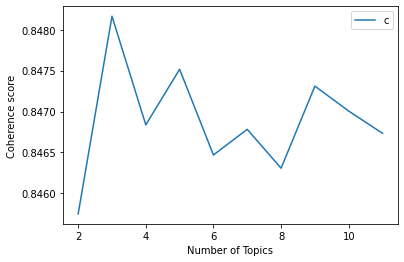

In [15]:
# Show graph
x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc = 'best')
plt.show()

In [16]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, 
                                   num_topics = 9, 
                                   id2word = dictionary)
lda_model.show_topics()

[(0,
  '0.023*"technology" + 0.022*"founder" + 0.019*"u" + 0.014*"small" + 0.012*"great" + 0.012*"million" + 0.011*"didnt" + 0.011*"come" + 0.011*"people" + 0.011*"might"'),
 (1,
  '0.032*"work" + 0.029*"market" + 0.023*"better" + 0.020*"computer" + 0.018*"monopoly" + 0.017*"get" + 0.014*"look" + 0.013*"big" + 0.013*"see" + 0.011*"think"'),
 (2,
  '0.034*"make" + 0.030*"world" + 0.026*"future" + 0.026*"good" + 0.017*"time" + 0.016*"energy" + 0.016*"company" + 0.015*"much" + 0.014*"instead" + 0.013*"product"'),
 (3,
  '0.032*"even" + 0.022*"like" + 0.019*"new" + 0.017*"human" + 0.016*"know" + 0.013*"important" + 0.012*"take" + 0.010*"youre" + 0.008*"country" + 0.008*"wont"'),
 (4,
  '0.073*"company" + 0.032*"business" + 0.017*"startup" + 0.011*"many" + 0.010*"ceo" + 0.009*"find" + 0.009*"cant" + 0.009*"life" + 0.009*"best" + 0.008*"right"'),
 (5,
  '0.033*"would" + 0.029*"every" + 0.027*"year" + 0.021*"today" + 0.018*"product" + 0.013*"build" + 0.012*"entrepreneur" + 0.011*"competition"

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.168178 -0.018030       1        1  11.441435
4     -0.099268  0.151319       2        1  11.429297
2     -0.132878 -0.107833       3        1  11.259529
0      0.088449 -0.128601       4        1  11.223848
1     -0.015960  0.151811       5        1  11.177325
3      0.125693  0.038309       6        1  11.160856
6     -0.010778 -0.135232       7        1  10.839430
8      0.093186  0.022326       8        1  10.760050
7      0.119733  0.025931       9        1  10.708229, topic_info=         Term        Freq       Total Category  logprob  loglift
58    company  255.000000  255.000000  Default  30.0000  30.0000
192    people  199.000000  199.000000  Default  29.0000  29.0000
18       make   86.000000   86.000000  Default  28.0000  28.0000
2         one  132.000000  132.000000  Default  27.0000  27.0000
105     would   88.000000   88.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
164   startup   14.571184   62.347262   Topic9  -5.1142   0.7805
2         one   16.503165  132.587898   Topic9  -4.9897   0.1505
3060   secret   14.250850   63.141019   Topic9  -5.1364   0.7456
58    company   16.322522  255.694267   Topic9  -5.0007  -0.5173
103      even   13.342519  127.582750   Topic9  -5.2023  -0.0237

[510 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
475       1  0.047424   able
475       2  0.047424   able
475       4  0.142272   able
475       6  0.663937   able
475       8  0.047424   able
...     ...       ...    ...
1367      4  0.046259  youll
1367      7  0.046259  youll
1367      8  0.046259  youll
1451      1  0.164022  youre
1451      6  0.787308  youre

[1059 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 3, 1, 2, 4, 7, 9, 8])